
3D modelling of the structures observed at Dicksinson Point, Bermagui, NSW.
===================





### The structure was mapped during multiple field trips as part of the Victorian Institute of Earth and Planetary Science, Monash University, Advanced Structural Mapping course

### No real data are used as the course is taught without a compass... We have attempted to generate "synthetic" data to explain how the model is built.  S4, S3, and S2 are built using data, however S0/S1 is built using a sinusoidal profile fitting the qualitative observations in the field. Future iterations of this notebook will use field measured data.

#### Loading the required libraries from LoopStructural, numpy, pandas and matplotlib. Setting up the model extent

In [1]:
if 'google.colab' in str(get_ipython()):
      !git clone https://github.com/Loop3D/BermaguiModel.git
      !pip install LoopStructural Loopstructuralvisualisation trame
      %cd BermaguiModel
else:
      print('Not running on CoLab, nothing to do')

Not running on CoLab, nothing to do


In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import Loop3DView, RotationAnglePlotter
from LoopStructural.modelling.features.fold.fold_function import FoldRotationType

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

origin = (0.0, 0.0,0.0)          
maximum = (8000,2000,8000) #12000, 2000, 13000
bb = np.zeros((2,3))
bb[0,0] = origin[0] 
bb[0,1] = origin[1] 
bb[0,2] = origin[2]
bb[1,0] = maximum[0]
bb[1,1] = maximum[1]
bb[1,2] = maximum[2]

### Reading data in and displaying the data

In [2]:
data = pd.read_csv('./Bermagui_Data/Bermagui_data_vectors_v2.csv')
data

,X,Y,Z,nx,ny,nz,feature_name,val,Unnamed: 8
0,4300,1000,7500,-0.342020,0.0,-0.939693,S0,NaN,NaN
1,5200,1000,6800,-1.000000,0.0,0.000000,S0,NaN,NaN
2,4000,1000,5600,-0.707107,0.0,0.707107,S0,NaN,NaN
3,4000,1000,4000,-0.707107,0.0,-0.707107,S0,NaN,NaN
4,6000,1000,4100,0.707107,0.0,-0.707107,S0,NaN,NaN
5,6750,1000,5800,0.819152,0.0,-0.573576,S0,NaN,NaN
6,8000,1000,7200,0.906308,0.0,0.422618,S0,NaN,NaN
7,7100,1000,7200,0.173648,0.0,0.984808,S0,NaN,NaN
8,1200,1000,11600,0.000000,0.0,1.000000,S2,1.0,`
9,4800,1000,8250,0.422618,0.0,0.906308,S2,NaN,NaN


# Modelling S4


1. Create a geological model using the bounding box
2. Associate the data to the model
3. Add the fold frame associated to upright S4 to the model 
4. Create an interactive view of the model S4 scalar field+data+isosurfaces
Note - due to a new visualisation package (pyVista), the data are not visible. This will be fixed with LoopStructural updates

In [3]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
S4 = model.create_and_add_fold_frame('S4',
                                     nelements=1e4, 
                                     buffer=0.5,
                                     solver='cg',
                                     damp=True)

In [4]:
view4 = Loop3DView(model)#, shape = (1,2))
view4.plot_data(S4[0], name = "S4_data", scale = 1000)
view4.remove_scalar_bar("values")
view4.remove_scalar_bar("GlyphScale")
view4.plot_surface(model["S4"][0], name = "S4", value =11, paint_with= model["S4"][0], scalar_bar = True )
#view.subplot(0,1)
# view.plot_data(S5[0], scale = 1000)
view4.remove_scalar_bar("values")
view4.screenshot("./test.jpg")
view4.show()

Widget(value='<iframe src="http://localhost:55509/index.html?ui=P_0x187e6c85520_0&reconnect=auto" class="pyvis…

# Modelling S3


1. Add the fold frame associated to recumbent S3 to the model using F4 scalar fields 
2. Add S3 to visualisation - 
Note: due to a new visualisation package (pyVista), the data are not visible. This will be fixed with LoopStructural updates

In [5]:
S3 = model.create_and_add_folded_fold_frame('S3',
                                            limb_wl= 16000, 
                                            fold_frame=S4,
                                            av_fold_axis=True,
                                            nelements=1e4,
                                            buffer=0.3,
                                            lag=0.05, #svriogram lag
                                            solver='cg',
                                            limb_profile_type=FoldRotationType.FOURIER_SERIES,  #default
                                            )


fold axis  [ 9.19962584e-08 -1.00000000e+00  3.40876901e-08]


<Axes: >

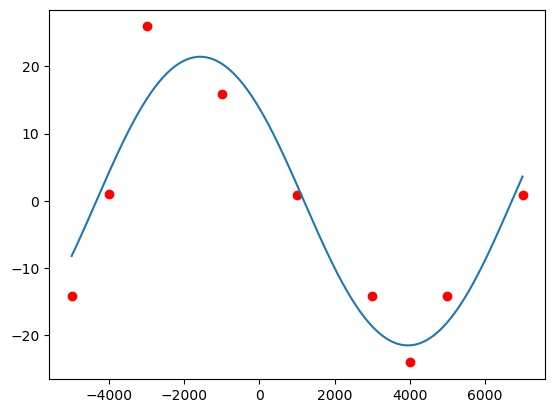

In [6]:
S3[0].builder.set_fold_axis()  # initialise the fold axis to calculate the rotation angle
S3.fold.fold_axis
S3[0].builder.set_fold_limb_rotation()  # calculate the rotation angle
profile = S3.fold.fold_limb_rotation
print('fold axis ', S3.fold.fold_axis)
profile.plot()

In [7]:
#uncomment below to edit the profile values - this will obviously change the model

# from ipywidgets import interact

# @interact(c0=(-90, 90, 0.01), c1=(-90, 90, 0.01), c2=(-90, 90, 0.01), w=(0, 50000, 0.01))
# def fn(c0=profile.c0, c1=profile.c1, c2=profile.c2, w=profile.w):
#     profile.c0 = c0
#     profile.c1 = c1
#     profile.c2 = c2
#     profile.w = w
#     profile.plot()

In [8]:
view3 = Loop3DView(model)#, shape = (1,2))
view3.plot_surface(model["S4"][0], name = "S4", value =11, paint_with= model["S4"][0], scalar_bar = True )
view3.plot_surface(model["S3"][0], name = "S3", value =11, paint_with= model["S3"][0], scalar_bar = True )
view3.plot_data(S4[0], name = "S3_data" ,scale = 1000)
view3.remove_scalar_bar("GlyphScale")
view3.remove_scalar_bar("values")
view3.show()

Widget(value='<iframe src="http://localhost:55509/index.html?ui=P_0x187f4844110_1&reconnect=auto" class="pyvis…

# Modelling S2




In [9]:
fold_weights = {'fold_orientation':1.0, 'fold_axis_w':1.0, 'fold_regularisation':[0.1, 0.01, 0.01], 'fold_normalisation':0.25, 'fold_norm':2.5, 'step':2}
#ALL about the folded foliation // fold_orientation & fold_axis = // to folded foliation / ortho constraints;  fold_regularisation = //to fold frame;  fold_normalisation = weighting of the norm constraint in the axial surface direction/
# norm of scalar field =    // step = how many elements

S2 = model.create_and_add_folded_fold_frame('S2',
                                            limb_wl= 6000, #5000
                                            fold_frame=S3,
                                            fold_weights = fold_weights,
                                            #av_fold_axis=True,
                                            fold_axis=[0.,1.,0.],
                                            nelements=1e5,
                                            buffer=0.2,
                                            lag=0.05, #svriogram lag
                                            solver='cg'
                                           )

<Axes: >

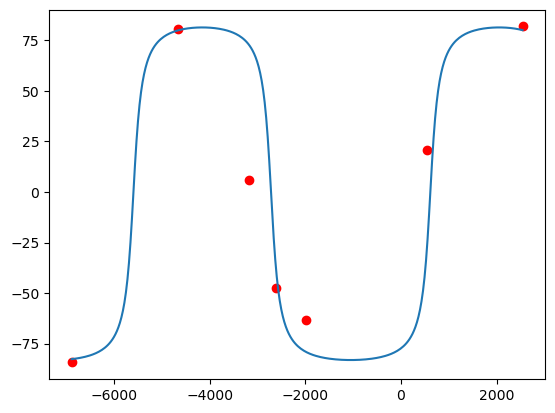

In [10]:
S2[0].builder.set_fold_axis()  # initialise the fold axis to calculate the rotation angle
S2[0].builder.set_fold_limb_rotation()  # calculate the rotation angle
profile = S2.fold.fold_limb_rotation
profile.plot()

In [11]:
#uncomment below to edit the profile values - this will obviously change the model

# from ipywidgets import interact

# @interact(c0=(-90, 90, 0.01), c1=(-90, 90, 0.01), c2=(-90, 90, 0.01), w=(0, 50000, 0.01))
# def fn(c0=profile.c0, c1=profile.c1, c2=profile.c2, w=profile.w):
#     profile.c0 = c0
#     profile.c1 = c1
#     profile.c2 = c2
#     profile.w = w
#     profile.plot()
#     # s1[0].scalar_field().vtk().contour(5).plot()

### Unfortunately, although the fit of the Fourier series is quite good, the synthetic data used are not capturing the right geometry for the recumbently folded S2 - the wavelength has to be larger to allow for the isoclinal folds of S0/S1 to be modelled. Below we increase the wavelength to an appropriate value, completely arbitrarily. 

<Axes: >

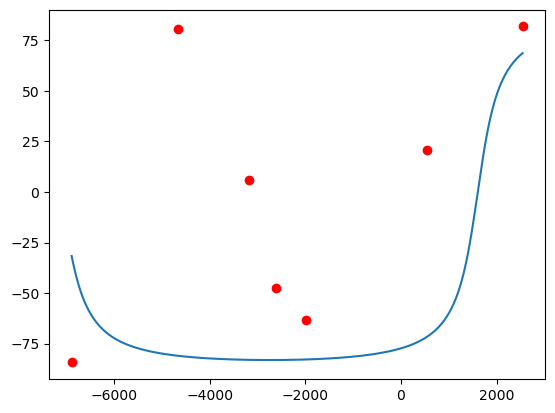

In [12]:
profile.w = 16221.59
profile.plot()

In [13]:
view2 = Loop3DView(model)#, shape = (1,2))
view2.clear()
view2.plot_surface(model["S4"][0], name = "S4", value =11, colour = "blue" )
view2.plot_surface(model["S3"][0], name = "S3", value =11, colour = "yellow" )
view2.plot_surface(model["S2"][0], name = "S2", value =11, colour = "red" )
view2.plot_data(S2[0], name = "S2_data", scale = 1000)

view2.remove_scalar_bar("GlyphScale")

view2.show()

Widget(value='<iframe src="http://localhost:55509/index.html?ui=P_0x1878c962510_2&reconnect=auto" class="pyvis…

# Modelling S1 // S0




1. Add the fold frame associated to S0/S1 using F2 scalar fields 
2. Add all foliation to the model visualisation - 
Note: due to a new visualisation package (pyVista), the data are not visible. This will be fixed with LoopStructural updates

In [14]:
model.data = pd.read_csv('./Bermagui_Data/Bermagui_data_vectors_S2.csv')
fold_weights = {'fold_orientation':10.0, 'fold_axis_w':10.0, 'fold_regularisation':[0.1, 0.01, 0.01], 'fold_normalisation':1.0, 'fold_norm':2.5, 'step':2}
S0 = model.create_and_add_folded_fold_frame('S0',
                                            # limb_wl= 1800,
                                            fold_frame=S2,
                                            #fold_weights = fold_weights,
                                            #av_fold_axis=True,
                                            fold_axis=[0.,1.,0.],
                                            nelements=5e5,
                                            #buffer=0.0,
                                            #lag=0.05, #svriogram lag
                                            solver='cg',
                                            limb_profile_type=FoldRotationType.TRIGONOMETRIC,
                                           )

<Axes: >

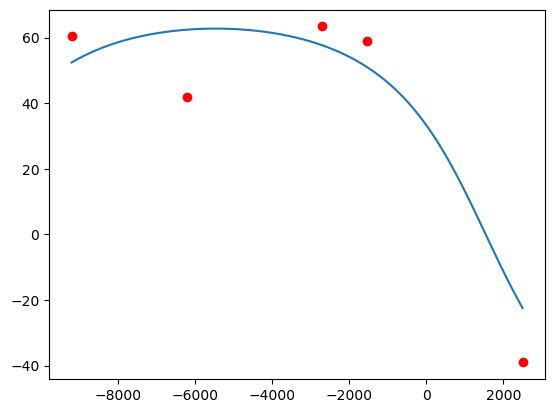

In [15]:
S0[0].builder.set_fold_axis()  # initialise the fold axis to calculate the rotation angle
S0[0].builder.set_fold_limb_rotation()  # calculate the rotation angle
profile = S0.fold.fold_limb_rotation
profile.plot()

In [16]:
#Uncomment below for interactive fold profile modelling - the appropriate values are in the following cell, which will override the interactive settings if run

# from ipywidgets import interact

# profile = S0.fold.fold_limb_rotation
# profile.origin = 0
# profile.wavelength = 5000
# profile.inflectionpointangle = 0.2


# @interact(
#     origin=(-5000, 5000, 1),
#     wavelength=(0, 5000, 1),
#     inflectionpointangle=(np.deg2rad(0), np.deg2rad(90), 0.01),
# )
# def fn(
#     origin=profile.origin,
#     wl=profile.wavelength,
#     inflectionpointangle=profile.inflectionpointangle,
# ):
#     profile.origin = origin
#     profile.wavelength = wl
#     profile.inflectionpointangle = inflectionpointangle

#     profile.plot()

<Axes: >

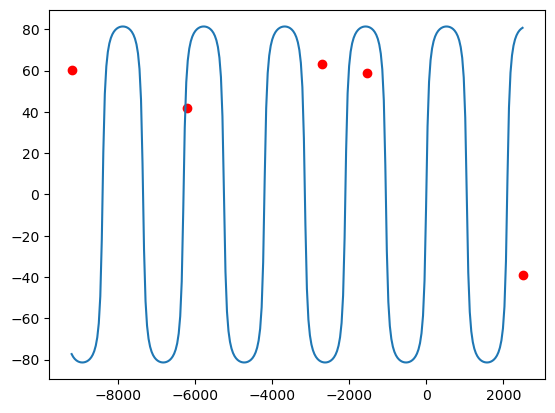

In [17]:
profile.origin =0
profile.wavelength = 2098
profile.inflectionpointangle = 1.42 
profile.plot()

In [19]:
view0 = Loop3DView(model)
view0.clear()
view0.plot_surface(model["S4"][0], name = "S4", value =7,  colour = 'blue' )
view0.plot_surface(model["S3"][0], name = "S3", value =7,  colour = "yellow" )
view0.plot_surface(model["S2"][0], name = "S2", value =11,  colour = 'red')
view0.plot_surface(model["S0"][0], name = "S0", value =11, colour = 'green' )
view0.show()

Widget(value='<iframe src="http://localhost:55509/index.html?ui=P_0x187a2633260_4&reconnect=auto" class="pyvis…

### Save the model into a geohy format ( run:   !pip install geoh5py in a separate cell if library is missing)  This allows to visualise the model in Geoscience Analyst

In [21]:
for s4 in (model["S4"][0].surfaces(7)) :
    s4.save('./Bermagui.geoh5')
for s3 in (model["S3"][0].surfaces(25)) :
    s3.save('./Bermagui.geoh5')
for s2 in (model["S2"][0].surfaces(65)) :
    s2.save('./Bermagui.geoh5')
for s0 in (model["S0"][0].surfaces(11)) :
    s0.save('./Bermagui.geoh5')

C:\Users\laure\.conda\envs\loop\Lib\site-packages\geoh5py\workspace\workspace.py:1089: UserWarning: From version 0.8.0, the 'h5file' attribute must be a string or path to an existing file, or user must call the 'create' method. We will attempt to `save` the file for you, but this behaviour will be removed in future releases.
  warnings.warn(
